In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.special import expit



In [2]:
column_names = np.array(load_iris().feature_names+["target"])
data_columns = np.c_[load_iris().data, load_iris().target]

iris_data= pd.DataFrame(data=data_columns, columns=column_names)


In [3]:
#single column
iris_first_two = iris_data.iloc[np.where(iris_data["target"] <=1.0)]

X = iris_first_two[["sepal length (cm)"]].values
y = iris_first_two["target"].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

log_reg = LogisticRegression(solver="lbfgs" , random_state=3)
log_reg.fit(x_train,y_train)
pred_y = log_reg.predict(x_test)
accuracy_score(pred_y, y_test)


0.9

<IPython.core.display.Javascript object>


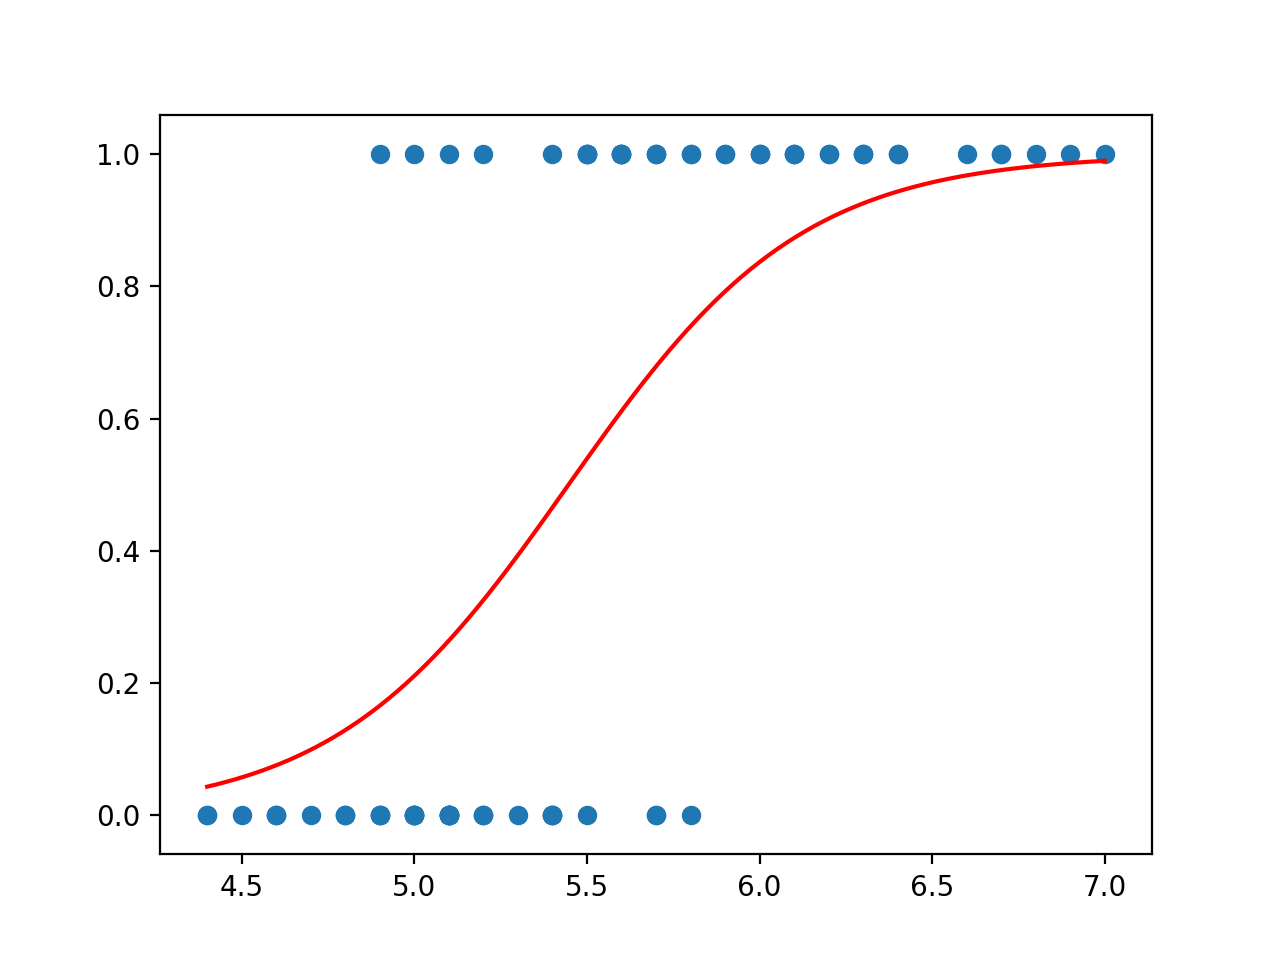

In [4]:
%matplotlib notebook 

model_line_x= np.linspace(np.min(x_train),np.max(x_train), 100 )
denominator = 1 + np.exp(-(log_reg.coef_[0][0]*model_line_x )-  log_reg.intercept_[0])

y_values = expit((model_line_x * log_reg.coef_  + log_reg.intercept_))

log_function =  1.0 / denominator
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(model_line_x, log_function, color="red")
plt.show()



In [5]:
#  plotting predictions on top of current data 


<IPython.core.display.Javascript object>


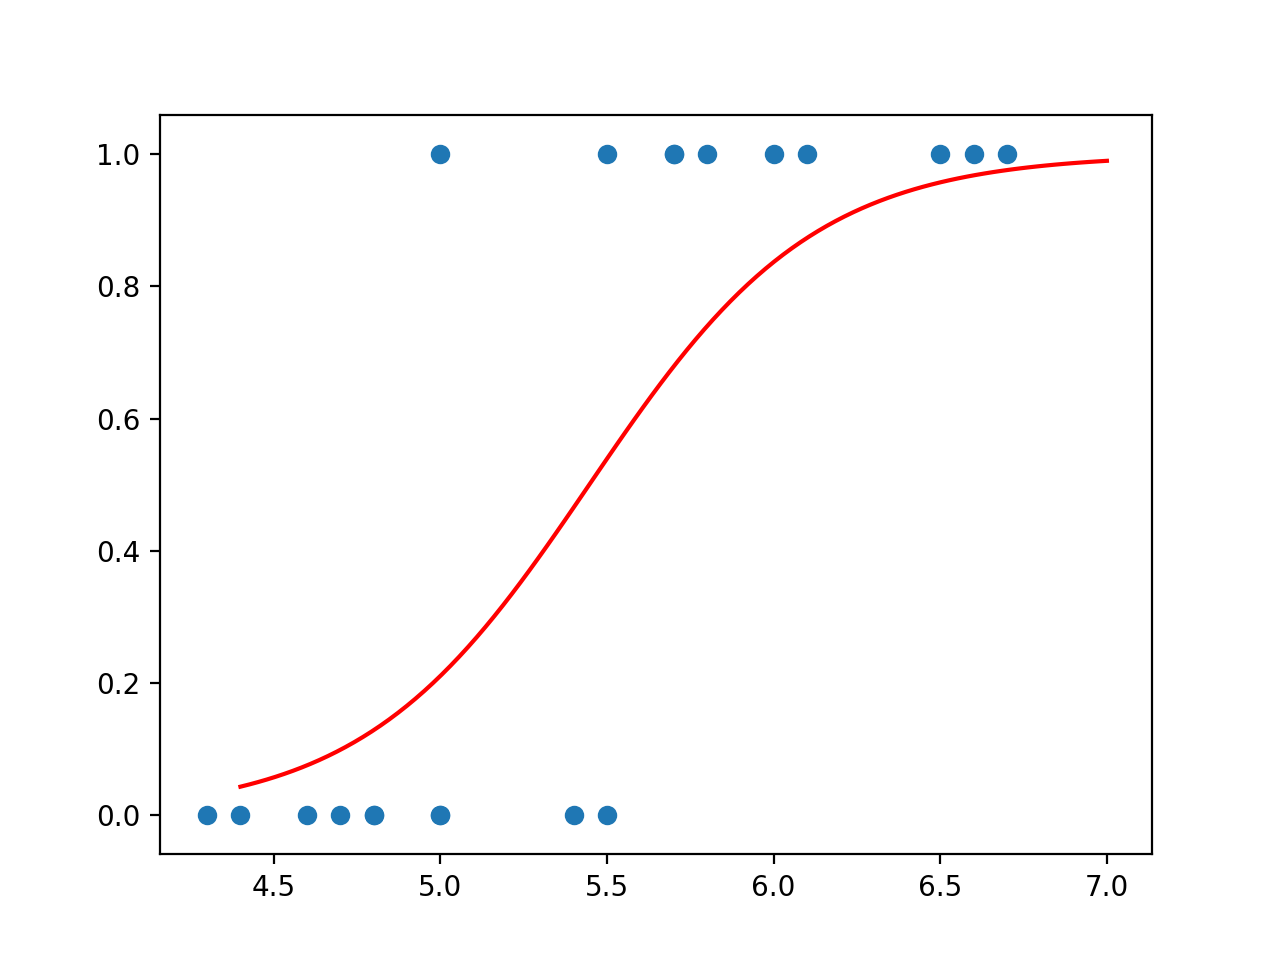

In [6]:
# test dataset

plt.figure()
plt.scatter(x_test, y_test)
plt.plot(model_line_x, log_function, color="red")
plt.show()


In [7]:
color=[]
for i in range(0, pred_y.size): 
    
    if pred_y[i] == y_test[i]: 
            color.append("green")
    else: 
            color.append("red")


<IPython.core.display.Javascript object>


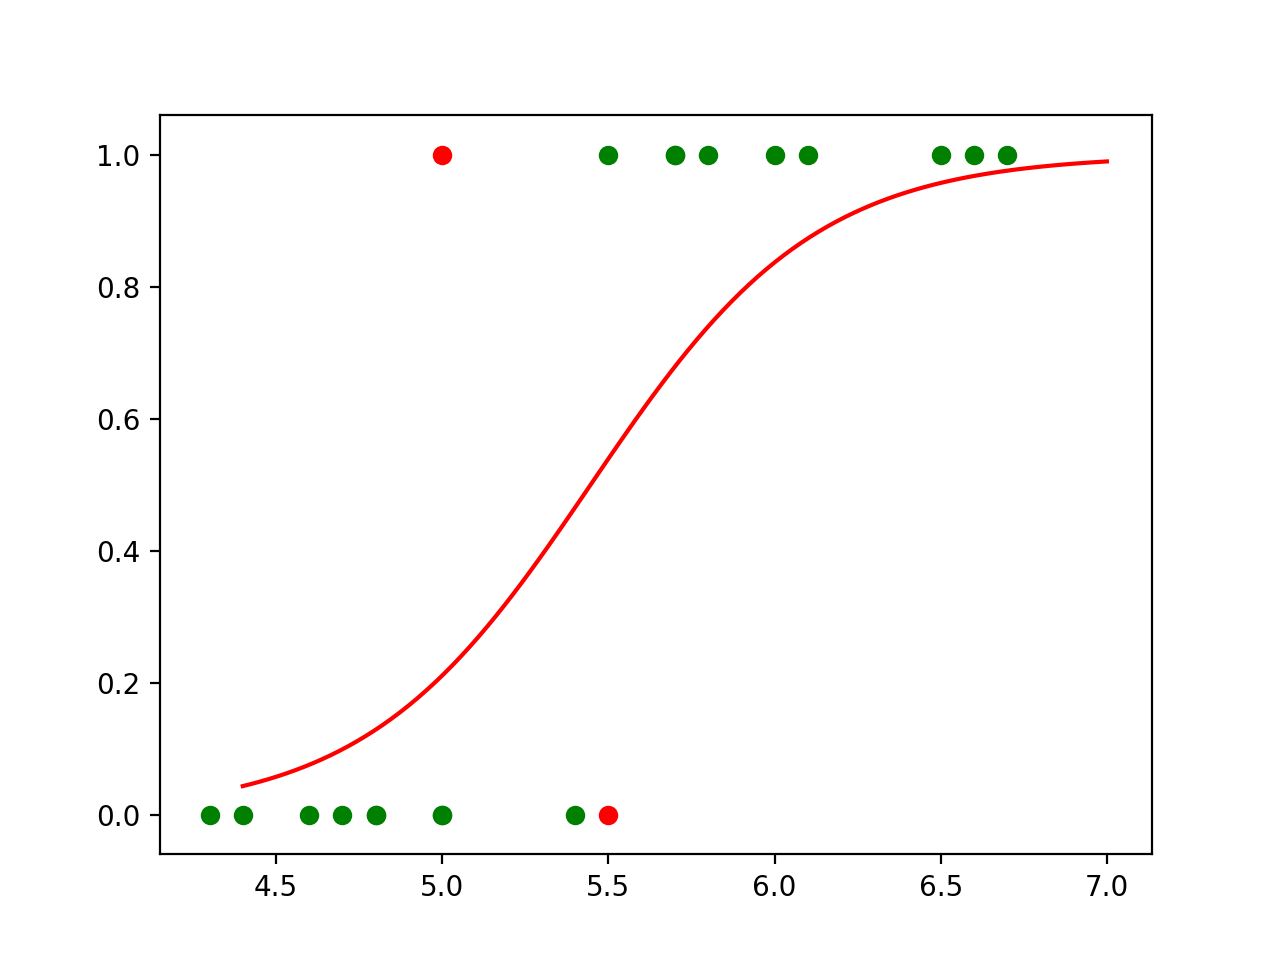

In [8]:
plt.figure()
for x,y,clr in zip(x_test, y_test, color):
    plt.scatter(x, y,color=clr )
plt.plot(model_line_x, log_function, color="red")
plt.show()


# Multinomial 


In [9]:
# multinomial logistic regression


X = iris_data.iloc[:,0:4].values
y = iris_data["target"].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

log_reg = LogisticRegression(solver="lbfgs" , random_state=3, multi_class="multinomial", max_iter=2000)
log_reg.fit(x_train,y_train)
pred_y = log_reg.predict(x_test)
accuracy_score(pred_y, y_test)

 

1.0

In [10]:
X = iris_data.iloc[:,0:4].values
y = iris_data["target"].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

log_reg = LogisticRegression(solver="lbfgs" , random_state=3, multi_class="ovr", max_iter=2000)
log_reg.fit(x_train,y_train)
pred_y = log_reg.predict(x_test)
accuracy_score(pred_y, y_test)


0.9666666666666667